## **Keras preprocessing layers**

In [ ]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
def visualization(image):
  plt.figure(figsize=(8, 8))
  plt.axis('off')
  plt.imshow(image)

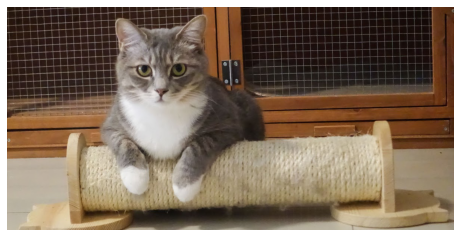

In [ ]:
image = tf.keras.preprocessing.image.load_img('cat.jpg')
visualization(image)

In [ ]:
## image to array
data = tf.keras.preprocessing.image.img_to_array(image)
print("data.shape: ", data.shape)
data

data.shape:  (600, 1200, 3)


array([[[ 52.,  38.,  27.],
        [ 95.,  81.,  70.],
        [ 53.,  39.,  28.],
        ...,
        [ 84.,  38.,  15.],
        [ 84.,  38.,  15.],
        [ 84.,  38.,  14.]],

       [[ 47.,  33.,  22.],
        [ 90.,  76.,  65.],
        [ 53.,  39.,  28.],
        ...,
        [ 83.,  38.,  15.],
        [ 84.,  38.,  15.],
        [ 84.,  38.,  15.]],

       [[ 41.,  27.,  16.],
        [ 82.,  68.,  57.],
        [ 54.,  40.,  29.],
        ...,
        [ 84.,  39.,  16.],
        [ 84.,  39.,  16.],
        [ 84.,  39.,  16.]],

       ...,

       [[194., 185., 168.],
        [194., 185., 168.],
        [194., 185., 168.],
        ...,
        [159., 151., 132.],
        [158., 150., 131.],
        [158., 150., 131.]],

       [[194., 185., 168.],
        [194., 185., 168.],
        [194., 185., 168.],
        ...,
        [159., 150., 133.],
        [158., 149., 132.],
        [157., 148., 131.]],

       [[194., 185., 168.],
        [194., 185., 168.],
        [194., 1

## **Resizing and Rescaling**

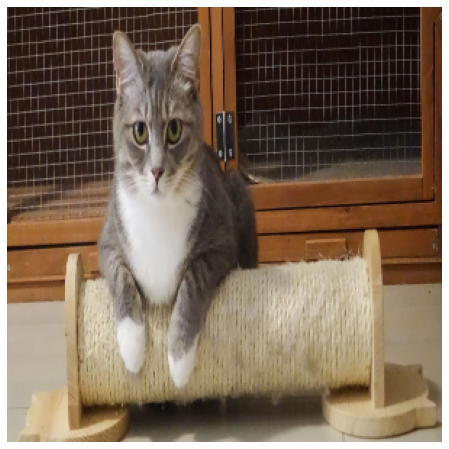

In [ ]:
IMG_SIZE = 300

resize_and_rescale = tf.keras.Sequential([
                                          tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
                                          tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

result = resize_and_rescale(data)
visualization(result)

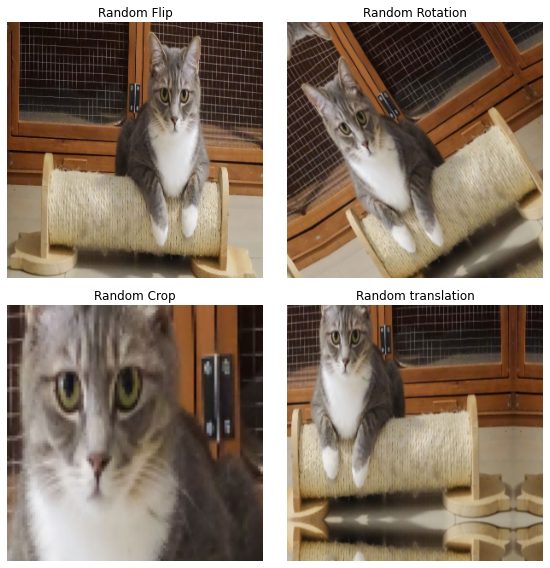

In [ ]:
result1 = tf.expand_dims(result, 0)

aug_rndflip = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")])
aug_rndrot = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomRotation(0.2, seed =220)])
aug_rndcrop = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomCrop(100,100, seed=220)])
aug_rndtrans = tf.keras.Sequential([
                                    tf.keras.layers.experimental.preprocessing.RandomTranslation(
                                        (-0.2, 0.2),
                                        (-0.2, 0.2),
                                        fill_mode = "reflect",
                                    interpolation="bilinear",
                                    seed=22,
                                    fill_value=0.0
                                    )
])

## visualization

fig = plt.figure(figsize=(8,8))

ax = plt.subplot(2, 2, 1)
augmented_image = aug_rndflip(result1)
plt.title("Random Flip")
plt.axis("off")
ax.imshow(augmented_image[0])

ax = plt.subplot(2,2,2)
augmented_image = aug_rndrot(result1)
plt.title("Random Rotation")
plt.axis("off")
ax.imshow(augmented_image[0])

ax = plt.subplot(2,2,3)
augmented_image = aug_rndcrop(result1)
plt.title("Random Crop")
plt.axis("off")
ax.imshow(augmented_image[0])

ax = plt.subplot(2,2,4)
augmented_image = aug_rndtrans(result1)
plt.title("Random translation")
plt.axis("off")
ax.imshow(augmented_image[0])

plt.tight_layout() #창 크기에 맞게 조정
plt.show()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7a018af320> (for post_execute):


KeyboardInterrupt: ignored

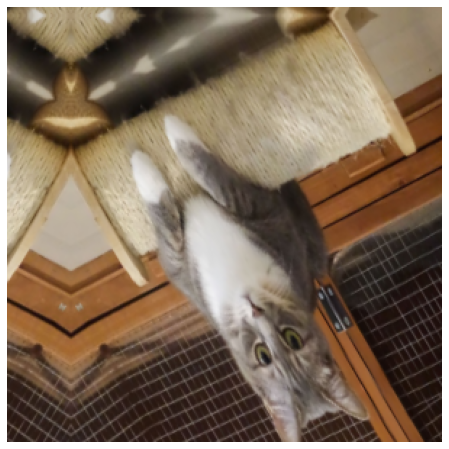

In [ ]:
aug_data = tf.keras.Sequential([
                               tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                               tf.keras.layers.experimental.preprocessing.RandomRotation(0.2, seed=220),
                               tf.keras.layers.experimental.preprocessing.RandomTranslation((-0.2, 0.2),(-0.2, 0.2), fill_mode="reflect", interpolation="bilinear")
] )

augmented_image = aug_data(result1)
visualization(augmented_image[0])

## **Albumentations**

In [ ]:
pip install albumentations as A

In [ ]:
pip install opencv-python

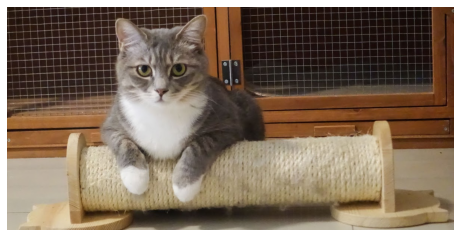

In [ ]:
import cv2

image = cv2.imread("cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

visualization(image)

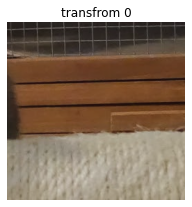

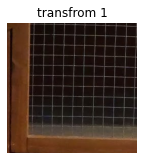

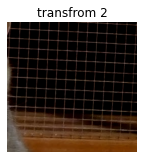

In [ ]:
import albumentations as A

import random

transform = A.Compose([
                       A.RandomCrop(width=256, height=256),
                       A.HorizontalFlip(p=0.5),
                       A.RandomBrightnessContrast(brightness_limit = 1, p=0.2)
])

fig = plt.figure(figsize=(8,8))

for i in range(3):
  transformed_image = transform(image=image)["image"]
  ax = plt.subplot(1,3,i+1)
  plt.title("transfrom %s"%i)
  plt. axis("off")
  ax.imshow(transformed_image)

  plt.tight_layout()
  plt.show()

## **ImageDataGenerator**

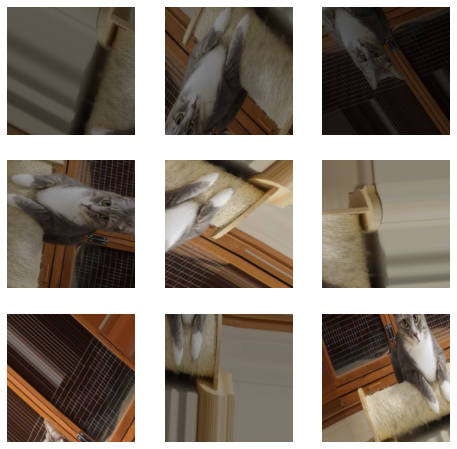

In [ ]:
result1 = tf.expand_dims(result, 0)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = [0.5, 1.0],
    brightness_range = [0.2, 1.0],
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    height_shift_range = 0.5,
    width_shift_range = 0.5
)

iterator = datagen.flow(result1, batch_size =1)

fig = plt.figure(figsize = (8,8))

for i in range(9):
  plt.subplot(3, 3, i+1)
  batch = iterator.next()
  image = batch[0].astype("uint8")
  plt.axis("off")
  plt.imshow(image)

## **Example**
Kaggle의 Dog vs.Cats 데이터를 이용해 간단한 신경망 구현 및 Data Augmentation 해보기

### 1) 데이터 불러오기

In [ ]:
#드라이브 마운트 하기

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

base_dir = "/content/drive/Shareddrives/TNT/스터디/2021년 1학기/CV 팀/발제/2주차/mini_dog_vs_cats"
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")

#train
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

#test
valid_cats_dir = os.path.join(valid_dir, "cats")
valid_dogs_dir = os.path.join(valid_dir, "dogs")

print("Total training cat images :", len(os.listdir(train_cats_dir)))
print("Total training dog images :", len(os.listdir(train_dogs_dir)))

print("Total validation cat images :", len(os.listdir(valid_cats_dir)))
print("Total validation dog images :", len(os.listdir(valid_dogs_dir)))

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

Total training cat images : 500
Total training dog images : 501
Total validation cat images : 250
Total validation dog images : 250


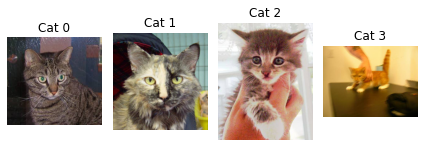

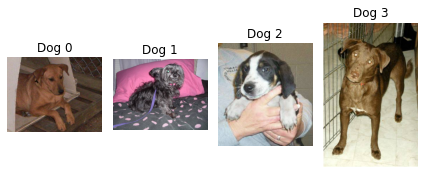

In [ ]:
## visualization

for i in range(4):
  image_path = os.path.join(train_cats_dir, train_cat_fnames[i])
  image = tf.keras.preprocessing.image.load_img(image_path)
  ax = plt.subplot(1, 4, i+1)
  plt.title("Cat %s"%i)
  plt.axis("off")
  ax.imshow(image)

plt.tight_layout()
plt.show()

for i in range(4):
  image_path = os.path.join(train_dogs_dir, train_dog_fnames[i])
  image = tf.keras.preprocessing.image.load_img(image_path)
  ax = plt.subplot(1, 4, i+1)
  plt.title("Dog %s"%i)
  plt.axis("off")
  ax.imshow(image)

plt.tight_layout()
plt.show()

### **2) Data Preprocessing**

Without Augmentation

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = "binary",
                                                    target_size = (150, 150))

valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                   batch_size = 20,
                                                   class_mode = "binary",
                                                   target_size = (150,150))

Found 1001 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


With Augmentation

In [ ]:
train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,
                                                                    horizontal_flip = True,
                                                                    brightness_range =[0.2, 1.0],
                                                                    height_shift_range = 0.5)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,
                                                                   horizontal_flip = True,
                                                                   brightness_range =[0.2, 1.0],
                                                                   height_shift_range =0.5)

train_generator = train_datagen_aug.flow_from_directory(train_dir,
                                                        batch_size =20,
                                                        class_mode = "binary",
                                                        target_size = (150,150))

valid_generator = test_datagen_aug.flow_from_directory(valid_dir,
                                                       batch_size =20,
                                                       class_mode = "binary",
                                                       target_size = (150, 150))

Found 1001 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### **3) Modeling**

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = "relu", input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)           

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.001),
              loss="binary_crossentropy",
              metrics = ["accuracy"])

### **4) Training**

Using Original Data

In [47]:
history = model.fit(train_generator, validation_data = valid_generator,
                    epochs = 50)
#steps_per_epoch = 100
#validation_steps =50

Epoch 1/50
51/51 [==============================] - 34s 663ms/step - loss: 0.6940 - accuracy: 0.4908 - val_loss: 0.6920 - val_accuracy: 0.5500
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5226

KeyboardInterrupt: ignored

Using Augmented Data

In [ ]:
history = model.fit(train_generator, validation_data = valid_generator, epochs = 50)